In [1]:
%matplotlib inline

In [2]:
# Copyright (c) 2015,2018 MetPy Developers.
# Distributed under the terms of the BSD 3-Clause License.
# SPDX-License-Identifier: BSD-3-Clause

# GINI Water Vapor Imagery

Use MetPy's support for GINI files to read in a water vapor satellite image and plot the
data using CartoPy.

In [3]:
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import xarray as xr

from metpy.cbook import get_test_data
from metpy.plots import add_metpy_logo, add_timestamp, colortables

In [4]:
# Use Xarray together with MetPy's GINI backend to directly open the file from the test data
ds = xr.open_dataset(get_test_data('WEST-CONUS_4km_WV_20151208_2200.gini', as_file_obj=False))
print(ds)

<xarray.Dataset> Size: 28MB
Dimensions:     (y: 1280, x: 1100)
Coordinates:
  * y           (y) float64 10kB 4.365e+06 4.36e+06 ... -8.286e+05 -8.327e+05
  * x           (x) float64 9kB -4.226e+06 -4.222e+06 ... 2.357e+05 2.397e+05
    lon         (y, x) float64 11MB ...
    lat         (y, x) float64 11MB ...
    time        datetime64[ns] 8B ...
Data variables:
    projection  int64 8B ...
    WV          (y, x) float32 6MB ...
Attributes:
    satellite:  GOES-15
    sector:     West CONUS


Pull out the data and (x, y) coordinates. We use `metpy.parse_cf` to handle parsing some
netCDF Climate and Forecasting (CF) metadata to simplify working with projections.

In [5]:
x = ds.variables['x'][:]
y = ds.variables['y'][:]
dat = ds.metpy.parse_cf('WV')

Plot the image. We use MetPy's xarray/cartopy integration to automatically handle parsing
the projection information.

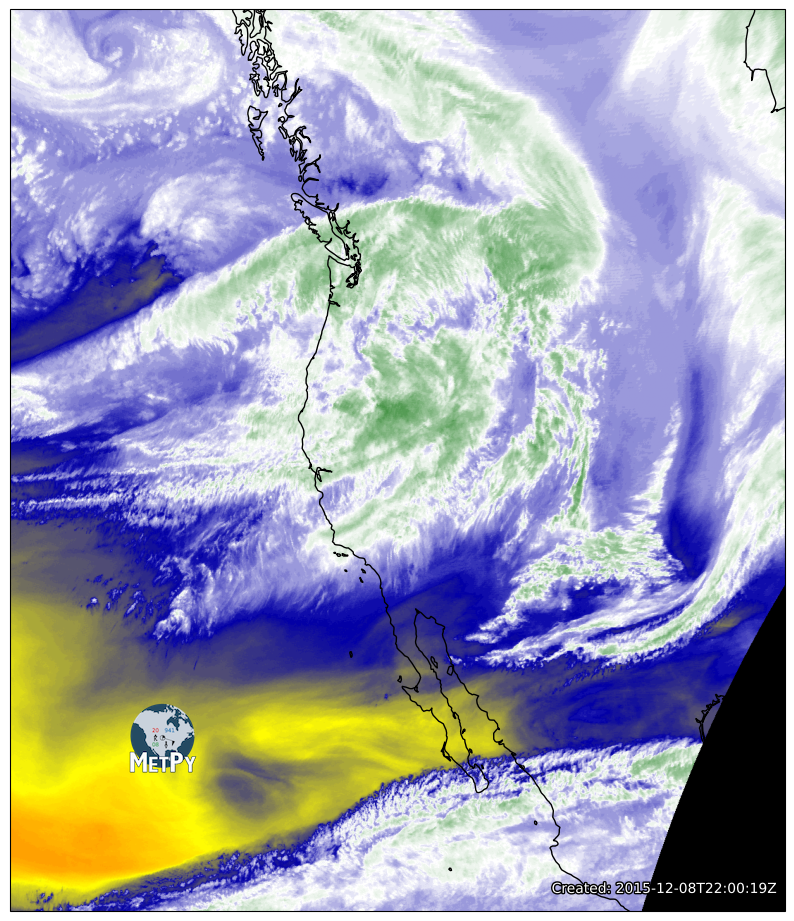

In [6]:
fig = plt.figure(figsize=(10, 12))
add_metpy_logo(fig, 125, 145)
ax = fig.add_subplot(1, 1, 1, projection=dat.metpy.cartopy_crs)
wv_norm, wv_cmap = colortables.get_with_range('WVCIMSS', 100, 260)
wv_cmap.set_under('k')
im = ax.imshow(dat[:], cmap=wv_cmap, norm=wv_norm,
               extent=(x.min(), x.max(), y.min(), y.max()), origin='upper')
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
add_timestamp(ax, ds.time.dt, y=0.02, high_contrast=True)

plt.show()